<div style="border:solid green 2px; padding: 20px">

<b>Привет, Юрий! Поздравляю с выполнением очередного проекта!</b>

Меня зовут Петр Раздобреев и я буду проверять твою работу. Попробую помочь сделать тебе её еще лучше! В Практикуме принято общени на ты, но если это дискомфортно, то сообщи об этом)

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ Так выделены небольшие замечания.Такие замечания в проекте допустимы, это пространство для улучшений в будущем.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Так я выделяю успешные идеи.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
    



<div class="alert alert-info"> <b>Комментарий студента:</b> Петр, привет! Спасибо за молниеносную проверку проекта.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Здравствуй, Юрий, а теперь ревьюеры за проекты бьются, так что да, молниеносные первичные проверки часто могут происходить)  
</div>


ссылка на датасет, для локальной работы

https://drive.google.com/file/d/134-_kv2lJCDp_maogyyJZU7W9strjws5/view?usp=sharing


In [269]:
# загрузка файла для Колаба

'''! gdown --id 134-_kv2lJCDp_maogyyJZU7W9strjws5'''

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=134-_kv2lJCDp_maogyyJZU7W9strjws5
To: /content/rest_data.csv
100% 2.28M/2.28M [00:00<00:00, 157MB/s]


# Как рассказать историю с помощью данных

## Введение

Мы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. 

Проект многообещающий, но дорогой. Вместе с партнёрами мы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможем ли мы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

У нас есть база данных объектов общественного питания Москвы. Наша задача — найти закономерности успешности заведений в заисимости от их типа, размера и местоположения. 



## Импорт библиотек

In [270]:
# импортируем библиотеки numpy, pandas и модуль scipy.stats библиотеки scipy
import numpy as np
import pandas as pd
import scipy.stats as stats

# импортируем библиотеку datetime для работы с датами
import datetime as dt
from datetime import datetime, date
from datetime import timedelta

# Задаем некоторые опции библиотеки pandas, которые
# настраивают вывод
pd.set_option('display.max_columns', 12)
pd.set_option('display.max_rows', 15)
pd.options.display.max_colwidth = 100

# импортируем matplotlib и seaborn для построения графиков
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Загрузка данных

In [271]:
try:

  df = pd.read_csv('/content/rest_data.csv')

except:

  df = pd.read_csv('/datasets/rest_data.csv')

## Знакомство с данными

### Первый взгляд

In [272]:
# посмотрим на первые строки таблицы

df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [273]:
# общая информация о таблице

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [274]:
# изначальное количество строк

start_len = len(df)
print('Изначальное количество строк', start_len)

Изначальное количество строк 15366


### Вывод по знакомству с данными

У нас хорошие данные без пропусков, в таблице 15366 строк.

## Подготовка данных

### Пропуски

In [275]:
 # еще раз проверим пропуски
 
 df.isna().mean()

id             0.0
object_name    0.0
chain          0.0
object_type    0.0
address        0.0
number         0.0
dtype: float64

### Дубликаты

In [276]:
# смотрим дубликаты

df.duplicated().sum()

0

Явных дубликатов нет, но вдруг объекты имеют разные id, а остальные столбцы одинаковые? Получим фактически дубликаты, хоть и не 100% с формальной точки зрения.

In [277]:
# ищем дупликаты по столбцам ['address', 'object_name', 'object_type', 'number']

df[df.duplicated(subset = ['address', 'object_name', 'object_type', 'number'])]

,id,object_name,chain,object_type,address,number
2381,28611,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, строение 1",100
3481,20914,Буфет Мади,нет,буфет,"город Москва, Ленинградский проспект, дом 64",40
4431,23759,СТОЛОВАЯ ГБОУ города Москвы № 384,нет,буфет,"город Москва, Беловежская улица, дом 67",100
4537,23391,Столовая «Комбинат питания КОСМОС»,нет,столовая,"город Москва, Новозаводская улица, дом 12/11",15
5059,20021,LIFT,нет,кафе,"город Москва, Багратионовский проезд, дом 7, корпус 1",20
...,...,...,...,...,...,...
14578,222932,Старый Баку,нет,кафе,"город Москва, Кировоградская улица, владение 15А",120
14596,204947,Буфет при кинотеатре,нет,буфет,"город Москва, Ореховый бульвар, дом 22А",0
14844,219518,Sushi-Make,нет,предприятие быстрого обслуживания,"город Москва, Ярцевская улица, дом 19",0
15173,218542,Кофе с собой,да,предприятие быстрого обслуживания,"город Москва, Алтуфьевское шоссе, дом 70, корпус 1",0


In [278]:
# сколько таких дубликатов

len(df[df.duplicated(subset = ['address', 'object_name', 'object_type', 'number'])])

82

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Действительно некоторые столбцы лучше было исключить при поиске дубликатов, молодец, что сделал это. При наличии подстроки `id` в названии вероятно значения столбца будут уникальны/ </div>


In [279]:
# удалим дубликаты

little_duplicates = df.duplicated(subset = \
                          ['address', 'object_name', 'object_type', 'number'])
df = df[~little_duplicates  ]                    

In [280]:
# длина новой таблицы

len(df)

15284

In [281]:
# проверка

start_len - len(df)

82

Все верно, убрали 82 дубликата. Мелочь, а данные стали немного лучше

### Вывод по предобработке

У нас хорошие, чистые данные. Без пропусков, практически без дубликатов. Удалили лишь 0.005 данных с неполными дубликатами — совпадение было по полям _['address', 'object_name', 'object_type', 'number']_. Данные готовы к работе.

## Анализ данных

### Исследование соотношения видов объектов общественного питания по количеству

In [282]:
# считаем количество заведений каждого типа
# группируем таблицу по object_type

(df.groupby('object_type', as_index=False)['id'].count()
          .rename(columns={"id": "numbers_of_objects"})
          .sort_values(by='numbers_of_objects', ascending=False)
          )

,object_type,numbers_of_objects
3,кафе,6071
8,столовая,2584
7,ресторан,2282
6,предприятие быстрого обслуживания,1898
0,бар,855
1,буфет,577
4,кафетерий,395
2,закусочная,349
5,магазин (отдел кулинарии),273


In [283]:
# посмотрим на долю каждого типа заведений

t = (df.groupby('object_type', as_index=False)['id'].count()
          .rename(columns={"id": "numbers_of_objects"})
          .sort_values(by='numbers_of_objects', ascending=False)
          )
t['part'] = t['numbers_of_objects'] / t['numbers_of_objects'].sum()
t

,object_type,numbers_of_objects,part
3,кафе,6071,0.397213
8,столовая,2584,0.169066
7,ресторан,2282,0.149306
6,предприятие быстрого обслуживания,1898,0.124182
0,бар,855,0.055941
1,буфет,577,0.037752
4,кафетерий,395,0.025844
2,закусочная,349,0.022834
5,магазин (отдел кулинарии),273,0.017862


In [284]:
# какую общую долю занимают заведения с долей менее 5%

t.loc[t['part'] < 0.05]['part'].sum()

0.10429207013870714

In [285]:
# проверка

df.groupby('object_type')['id'].agg(['count']).sum()

count    15284
dtype: int64

In [286]:
t = (df.groupby('object_type', as_index=False)['id'].count()
          .rename(columns={"id": "numbers_of_objects"})
          .sort_values(by='numbers_of_objects', ascending=False)
          )
t['numbers_of_objects'].sum()

15284

Количества совпадают 15284 == 15284, всё верно.

Строим график

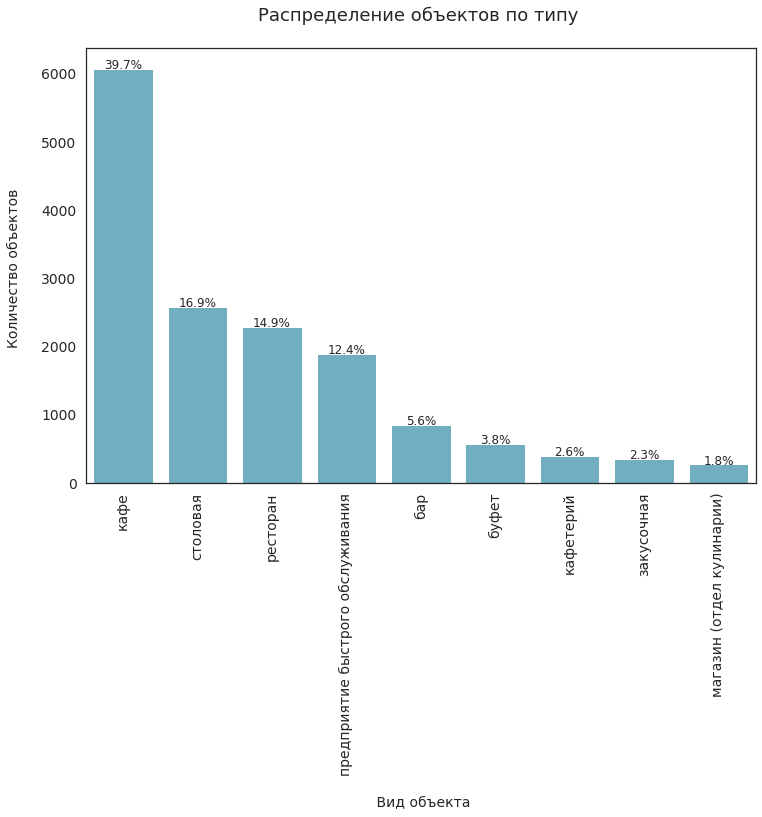

In [287]:
total = float(df.shape[0])
plt.figure(figsize=(12,8))
sns.set_palette('dark')
sns.set_theme(style="white")
ax = (sns.countplot(x='object_type', data=df, color='c', order=df.groupby('object_type')
                    .size().sort_values().index[::-1]));
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')                    
plt.xticks(fontsize=14, rotation=90);
plt.yticks(fontsize=14);
plt.title('Распределение объектов по типу \n',fontsize=18);
plt.xlabel('\n Вид объекта', fontsize=14);
plt.ylabel('Количество объектов \n', fontsize=14);

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

Если цвет не несет смысловой нагрузки, то делай все одним цветом. Иначе наш мозг думает, что в цвете есть какая-то логика и пытается ее отыскать
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Петр, поправил.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Благодарю 
</div>


### Вывод:
Основной тип заведения — кафе, почти 40%. Далее идет столовая с 17% и ресторан с 15%. Все еще весомая доля у предприятий быстрого обслуживания, 12%. Дале с серьезным провалом в доле бары — 5%. Остальные заведения занимают вместе 10%.

### Соотношение сетевых и несетевых заведений по количеству

Группируем данные по _chain_ и считаем количество заведений в каждой группе

In [288]:
df.groupby('chain', as_index=False)['id'].agg('count')

,chain,id
0,да,2964
1,нет,12320


In [289]:
t = df.groupby('chain', as_index=False)['id'].agg('count')
t['part'] = t['id'] / t['id'].sum()
t

,chain,id,part
0,да,2964,0.193928
1,нет,12320,0.806072


Для наглядности построим столбчатый график

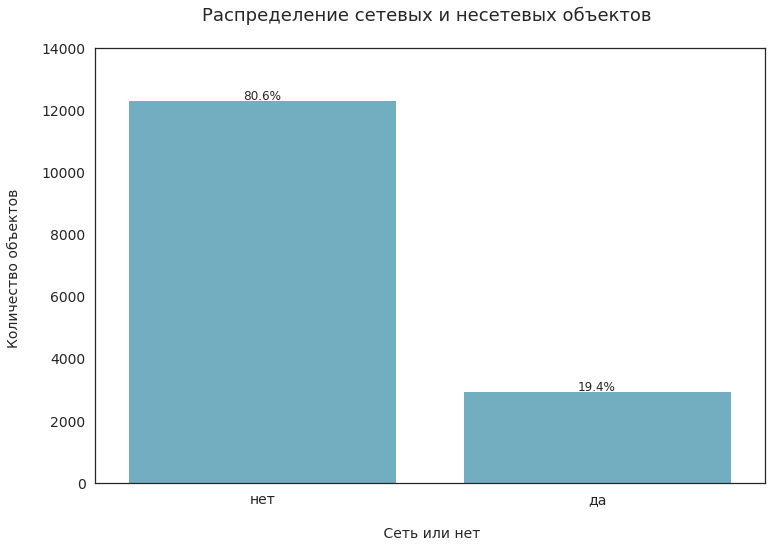

In [290]:
total = float(df.shape[0])
plt.figure(figsize=(12,8))
sns.set_palette('dark')
sns.set_theme(style="white")
ax = sns.countplot(x='chain', data=df, color='c', order=df.groupby('chain')\
                   .size().sort_values().index[::-1])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim(bottom=0, top=14000)
plt.title('Распределение сетевых и несетевых объектов \n',fontsize=18);
plt.xlabel('\n Сеть или нет', fontsize=14);
plt.ylabel('Количество объектов \n', fontsize=14);


### Вывод:
Несетевых заведений в 4.15 раз больше — 12320 объектов без сети и всего лишь 2964 сетевых заведений общественного питания. В процентах это 80,6% и 19,4%.

### Для какого вида объекта общественного питания характерно сетевое распространение?

Сгруппируем данные по типу и принадлежности к сети, посчитаем, сколько объектов каждого типа есть в сетевом/несетовом сегменте

In [291]:
df.groupby(['object_type', 'chain'])['id'].agg(['count']).reset_index()\
                              .sort_values(by='count', ascending=False)

,object_type,chain,count
7,кафе,нет,4675
17,столовая,нет,2581
15,ресторан,нет,1739
6,кафе,да,1396
13,предприятие быстрого обслуживания,нет,1110
...,...,...,...
4,закусочная,да,56
8,кафетерий,да,52
0,бар,да,37
2,буфет,да,11


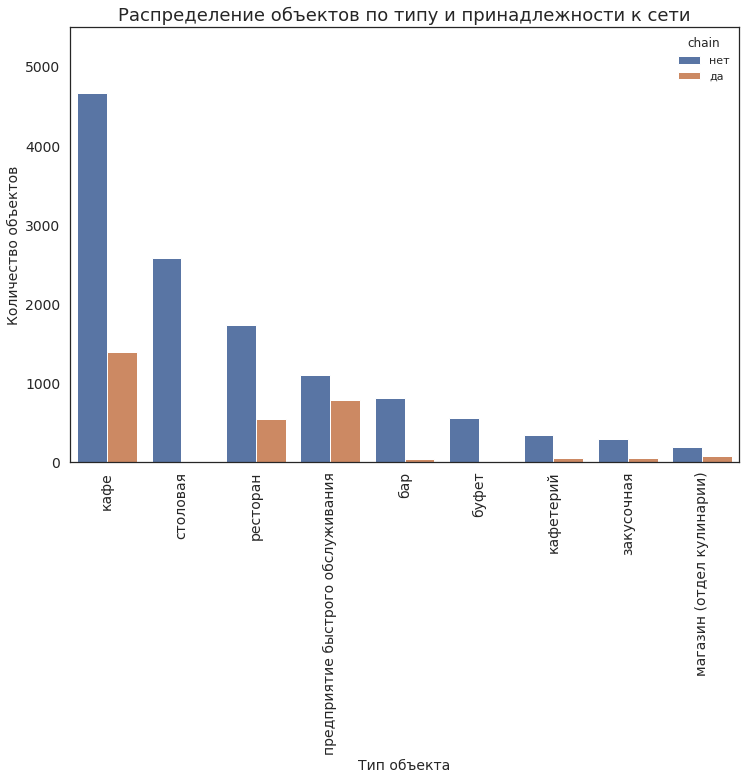

In [292]:
# цифры не очень наглядны, построим график

sns.set_palette('dark')
sns.set_theme(style="white")
plt.figure(figsize=(12,8))
sns.barplot(x='object_type', y='count', hue='chain', data=df.groupby(['object_type', 'chain'])\
            ['id'].agg(['count']).reset_index().sort_values(by='count', ascending=False))
plt.title('Распределение объектов по типу и принадлежности к сети', fontsize=18)
plt.xlabel('Тип объекта', fontsize=14)
plt.ylabel('Количество объектов', fontsize=14)
plt.xticks(fontsize=14, rotation=90) 
plt.yticks(fontsize=14)
plt.ylim(bottom=0, top=5500);

Видно, что:
1. Сетевых объектов значительно меньше
2. Большинство сетевых объектов сосредоточены в категориях _кафе, ресторан и предприятие быстрого питания._

В "абсолютных" значениях все понятно. Из-за в четыре с лишним раза большего количества сетевых объектов картина в абсолютных числах несколько смазываются. Посмотрим на относительные цифры.

In [293]:
# сгруппируем данные по типу объекта и посмотрим распределение по типу
# объекта в сетевых и несетевых заведениях, добавим колонки с долей 
# каждого типа в сетевых и несетевых заведениях

t = pd.pivot_table(df, index='object_type', values='id', columns='chain',\
                                                          aggfunc='count')
t = t.reset_index().rename(columns={"да": "сети", "нет": "не_сети"})\
                             .sort_values(by='сети', ascending=False)
t['chain_part'] = t['сети'] / t['сети'].sum().round(2)
t['not_chain_part'] = t['не_сети'] / t['не_сети'].sum().round(2)
t['chain_part'] = t['chain_part'].round(2)
t['not_chain_part'] = t['not_chain_part'].round(2)
t['chain_part_cumsum'] = t['chain_part'].cumsum()      # кумулятивная сумма для 
t                                                      # сетевых объектов

chain,object_type,сети,не_сети,chain_part,not_chain_part,chain_part_cumsum
3,кафе,1396,4675,0.47,0.38,0.47
6,предприятие быстрого обслуживания,788,1110,0.27,0.09,0.74
7,ресторан,543,1739,0.18,0.14,0.92
5,магазин (отдел кулинарии),78,195,0.03,0.02,0.95
2,закусочная,56,293,0.02,0.02,0.97
4,кафетерий,52,343,0.02,0.03,0.99
0,бар,37,818,0.01,0.07,1.00
1,буфет,11,566,0.00,0.05,1.00
8,столовая,3,2581,0.00,0.21,1.00


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Прошу объяснить, я думал, что ты построишь процент сетевых относительно общего числа заведений для каждого типа, а сейчас визуализация очень похожа на то, что было изображено выше и я не понимаю зачем она тогда строилась
</div>


<div class="alert alert-info"> <b>Комментарий студента:</b> Попробую объяснить. На графике показана доля каждого типа объекта в разрезе сеть/не сеть. Например, всего 1396 сетевых кафе, это 47% от всех сетевых объектов, что довольно много, почти половина. 
Задача показать именно долю в разрезе сеть/не сеть, потому что сетевых заведений в 4 раза меньше и в абсолютных цифрах сети теряются. Те же кафе - 4675 несетевых объектов против 1396 сетевых. На графике сети выглядят очень маленькими, поэтому решил сделать такую визуализацию. Попробовал донести свои мысли. Если не удалось, удалю этот пункт.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Понял, спасибо, мне кажется здесь бы удачнее смотрелся вариант с визуализацией процентов сетевых заведений относительно всех заведений типа, например для кафе 1396 /( 1396 +4675), там есть немного инсайтов 
</div>


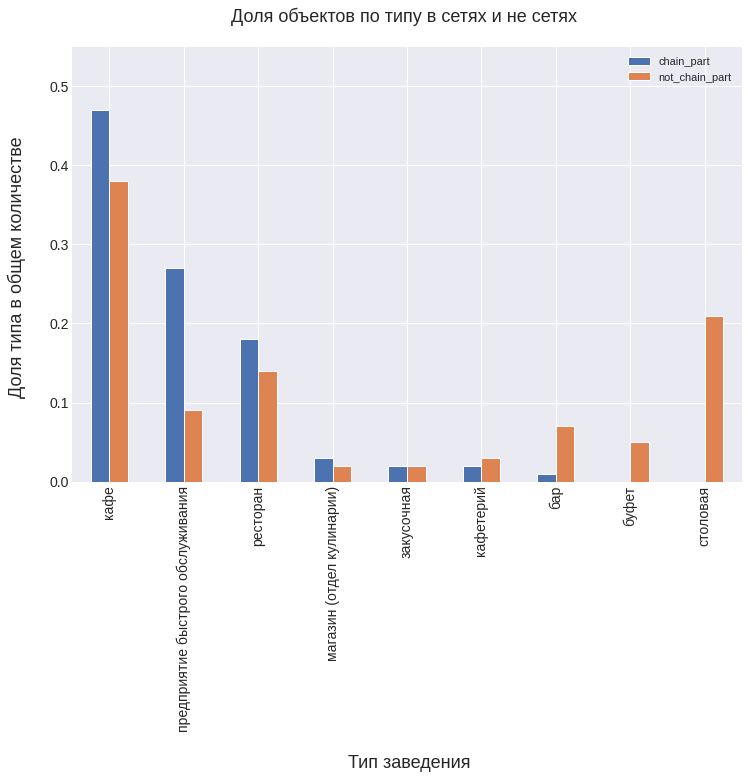

In [294]:
# для наглядности построим простой барплот


plt.style.use('seaborn-dark')
t.plot(x="object_type", y=["chain_part", "not_chain_part"],\
       kind="bar", figsize=(12, 8));
plt.title('Доля объектов по типу в сетях и не сетях \n', fontsize=18)
plt.ylabel('Доля типа в общем количестве \n', fontsize=18)
plt.xlabel('\n Тип заведения', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best')
plt.ylim(bottom=0, top=0.55)
plt.grid(axis='both')

In [295]:
# топ-3 категории сетевых объектов

list(t['object_type'][:3])

['кафе', 'предприятие быстрого обслуживания', 'ресторан']

In [296]:
# остальные типы объектов в категории "сети"

list(t['object_type'][4:])

['закусочная', 'кафетерий', 'бар', 'буфет', 'столовая']

### Вывод:
Основная масса сетевых заведений: 'кафе', 'предприятие быстрого обслуживания', 'ресторан'. Эти три категории занимают 92% по количеству от всех сетевых точек.

Остальные категории — 'закусочная', 'кафетерий', 'бар', 'буфет', 'столовая' — вместе дают всего лишь 8% по количеству. Если убрать "бар", то оставшиеся типы и вовсе дадут 5%. 

Этим сетевые заведения принципиально отличаются от несетевых. В несетях второе место занимает "столовая" с долей 21%. В три раза больше сетевиков в категории фастфуда — 27% и 9% соответственно. 

"Пустота" по сетевым заведениям в категориях "бар" и "буфет", что тоже логично. 

**Резюме**: для сетевых заведений наиболее востребованы категории _'кафе', 'предприятие быстрого обслуживания', 'ресторан'_. Худшие категории для сетей _'бар', 'буфет', 'столовая'_.

### Распределение по количеству посадочных мест в сетевых объектах

Посмотрим на названия сетевых объектов

In [297]:
df.query('chain == "да"')['object_name'].unique()

array(['ПИЦЦЕТОРИЯ', 'Брусника', 'Алло Пицца', 'Суши Wok', 'Тануки',
       "Домино'с Пицца", 'Готика', 'Му-Му', 'Хлеб насущный', 'TAJJ MAHAL',
       'ДАНКИН ДОНАТС', 'Вареничная №1', 'ШОКОЛАДНИЦА', 'Теремок',
       'Хинкальная', 'Шантимель', 'ТАНУКИ', 'Шоколадница', 'МУ-МУ',
       'Хинкальная City', 'КРУЖКА', 'СУШИ ВОК', 'ПРИМАВЕРА', 'Виктория',
       'Пиццерия «АКАДЕМИЯ»', 'Чебуречная СССР', 'МАКДОНАЛДС',
       'Grand Cru', 'Чайхона №1', 'Панчо Пицца', 'KFC', 'Сабвей',
       'ресторан «Якитория»', 'Советские времена', 'Кафе «Андерсон»',
       'Кафе «Subway»', 'Ресторан «Макдоналдс»', 'Суши Сет', 'Суши WoK',
       'Шоколад', 'Тирольские пироги', 'Гамбринус', 'Пицца Фабрика',
       'Subway', 'Кафе «Якитория»', 'Кафе «Тануки»', 'Сити Пицца',
       'Кружка', 'Кофе Хаус',
       'Кулинарная Лавка Братьев Караваевых Братья Караваевы', 'Суши Вок',
       'Прайм', 'Пицца Экспресс', 'Шоколадница Кофе Хаус', 'Николай',
       'Якитория', 'МАГНОЛИЯ', 'КОФЕ С СОБОЙ', 'Джаганнат', 'Волк

In [298]:
# сколько всего уникальных значений в object_name

df.query('chain == "да"')['object_name'].nunique()

724

724 значения, многие из которых повторяются, приведем к единообразию названия основных сетевых заведений для корректного последующего анализа. 

In [299]:
df.object_name = (df.object_name.replace({'Кафе «KFC»': 'KFC', 
                  'ШОКОЛАДНИЦА': 'Шоколадница', 'Кафе «Шоколадница»': 'Шоколадница', 
                  'МАКДОНАЛДС': 'Макдоналдс', 'Ресторан «Макдоналдс»': 'Макдоналдс', 
                  'БУРГЕР КИНГ': 'Бургер Кинг', 'Бургер Кинг Burger King': 'Бургер Кинг', 
                  'ТЕРЕМОК': 'Теремок', 'Кафе «Теремок»': 'Теремок', 
                  'Суши Вок': 'Суши Wok', 'Додо пицца': 'Додо Пицца', 
                  'Старбакс': 'Starbucks', 'Сабвей': 'Subway', 
                  'Иль Патио Планета Суши': 'Иль Патио', 
                  'Крошка картошка': 'Крошка Картошка', 'МИЛТИ': 'Милти', 
                  'Пиццерия «Папа Джонс»': 'Папа Джонс', 'АндерСон': 'Андерсон'})) 

In [300]:
# посмотрим, сколько теперь уникальных значений

df.query('chain == "да"')['object_name'].nunique()

706

Вроде бы убрали 18 значений, но потом посмотрим, сколько объектов попали в "оптимизированный" список. Сейчас проверим цифры по посадочным местам во всех сетевых объектах.

In [301]:
# записываем сети в новый дф df_chain

df_chain = df.query('chain == "да"')

Построим ящик с усами, оценим распределение значений по столбцу _number_ в таблице _df_chain_

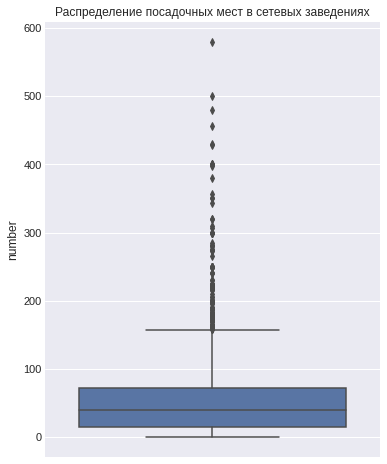

In [302]:
plt.figure(figsize=(6,8))
plt.title('Распределение посадочных мест в сетевых заведениях')
plt.grid()
sns.boxplot(y='number', data=df_chain);

Нормальные значения лежат в пределах number < 160. Отбрасывать или нет выбросы > 160? Посмотрим, что это за объекты

In [303]:
df_chain.query('number > 160')[['object_name', 'address']]

,object_name,address
53,Му-Му,"город Москва, улица Арбат, дом 45/24"
120,Макдоналдс,"город Москва, Большая Бронная улица, дом 29"
327,Тануки,"город Москва, Дмитровское шоссе, дом 64, корпус 3"
418,Две палочки,"город Москва, Мясницкая улица, дом 24/7, строение 1"
856,Му-Му,"город Москва, 9-я Парковая улица, владение 61А, строение 1"
...,...,...
13378,ПИЛЗНЕР,"город Москва, 1-я Тверская-Ямская улица, дом 7"
13438,Теремок,"город Москва, улица Народного Ополчения, дом 46, корпус 1"
13445,Макдоналдс,"город Москва, Свободный проспект, дом 33А"
13447,Макдоналдс,"город Москва, площадь Тверская Застава, дом 2, строение 2"


In [304]:
# сколько таких объектов

len(df_chain.query('number > 160')[['object_name', 'address']])

134

In [305]:
# посмотрим на статистические данные по столбцу number

df_chain['number'].describe()

count    2964.000000
mean       52.981107
std        57.152817
min         0.000000
25%        15.000000
50%        40.000000
75%        72.000000
max       580.000000
Name: number, dtype: float64

In [306]:
# максимальное значение 580, среднее и медианное 52 и 40. Посмотрим на 90, 95 
# 98 перцентиль

np.percentile(df_chain['number'], [90, 95, 99])

array([120.  , 158.85, 275.37])

Объекты с "посадкой" более 160 - вполне реальные заведения в количестве 134 шт. Убирать все аномально большие значения не будем, потому что:
1. Есть реальные объекты с таким количеством посадочных
2. В  принципе не хочется терять данные

Примем компромиссный вариант. Удалим 1% максимальных значений. Напомню, 99-й перцентиль = 275

In [307]:
df_chain.query('number > 275')[['object_name', 'address', 'number']]\
.sort_values(by='number', ascending=False)

,object_name,address,number
120,Макдоналдс,"город Москва, Большая Бронная улица, дом 29",580
3590,Чайхона №1,"город Москва, Пушкинская площадь, дом 2",500
6551,Макдоналдс,"город Москва, улица Арбат, дом 52, строение 1",480
8903,ЯКИТОРИЯ,"1-я Тверская-Ямская улица, дом 29/66, корпус 1",456
3092,Чайхона №1,"город Москва, улица Большая Полянка, дом 56, строение 1",430
...,...,...,...
5755,Макдоналдс,"город Москва, Зеленодольская улица, дом 38",284
2328,Якитория и Ян Примус,"город Москва, Спартаковская улица, дом 25/28, строение 1",282
7549,Кафе «Му-Му»,"город Москва, Балаклавский проспект, дом 7",280
2256,Старина Миллер,"город Москва, Шмитовский проезд, дом 2, строение 1",280


In [308]:
# проверим себя

len(df_chain.query('number > 275')[['object_name', 'address', 'number']]\
.sort_values(by='number', ascending=False)) / len(df_chain)

0.010121457489878543

<div class="alert alert-warning">
<b>Комментарий ревьюера v2:</b>⛅️ 

Столь точным можно не быть, рекомендую округлять такие хвосты
</div>

Все верно, 1% данных в столбце number имеют значение больше 275.

In [309]:
# делаем срез

df_chain = df_chain.query('number <= 275')

Получили таблицу с сетевыми объектами без аномально больших посадочных мест. Работаем дальше

In [310]:
# возьмем ТОП-15 сетей по количеству объектов и запишем в новую
# таблицу chain_names

chain_names = df_chain.groupby('object_name')['id'].count()\
                .sort_values(ascending=False).reset_index().head(15)
chain_names

,object_name,id
0,Шоколадница,171
1,KFC,165
2,Макдоналдс,155
3,Бургер Кинг,140
4,Теремок,101
5,Крошка Картошка,89
6,Домино'с Пицца,86
7,Милти,72
8,Суши Wok,71
9,Папа Джонс,57


Ранее оптимизировали название сетевых объектов, теперь видим, почти все оптимизированые названия попали в ТОП-15. Данные стали лучше, неявных дубликатов стало меньше.

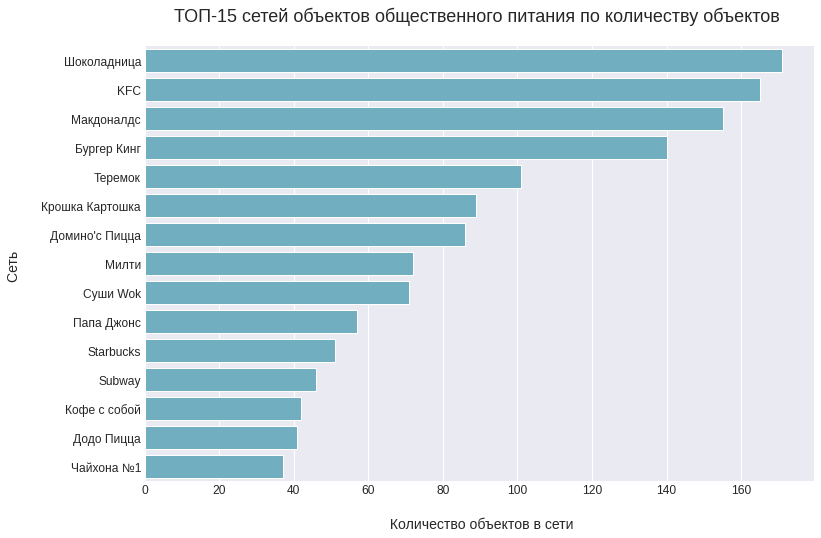

In [311]:
# построим график с ТОП-15 сетями

plt.figure(figsize=(12,8))
sns.barplot(data=chain_names, orient='h', x='id', y='object_name', color='c')
plt.title('ТОП-15 сетей объектов общественного питания по количеству объектов \n', fontsize = 18)
plt.grid(axis='x')
plt.xlabel('\n Количество объектов в сети', fontsize=14)
plt.ylabel('Сеть \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [312]:
# поменяем индекс в chain_names, теперь первая строка будет иметь индекс 1

chain_names.index += 1 
chain_names.index

RangeIndex(start=1, stop=16, step=1)

In [313]:
# ТОП-15 сетей по количеству объектов
# все сети смотреть не можем, да и не имеет смысла, 
# далее работаем с ТОП-15

chain_names['object_name']

1         Шоколадница
2                 KFC
3          Макдоналдс
4         Бургер Кинг
5             Теремок
6     Крошка Картошка
7      Домино'с Пицца
8               Милти
9            Суши Wok
10         Папа Джонс
11          Starbucks
12             Subway
13       Кофе с собой
14         Додо Пицца
15         Чайхона №1
Name: object_name, dtype: object

In [314]:
# посмотрим количество посадочных мест в ТОП-15 сетях

chain_15 = df_chain.groupby('object_name')['number'].agg(['count', 'mean', 'median'])\
.sort_values(by='count', ascending=False).reset_index().head(15)
chain_15 = chain_15.sort_values(by='mean', ascending=False)
chain_15

,object_name,count,mean,median
14,Чайхона №1,37,115.351351,95.0
2,Макдоналдс,155,83.529032,79.0
0,Шоколадница,171,57.216374,50.0
1,KFC,165,53.248485,48.0
3,Бургер Кинг,140,49.007143,45.0
10,Starbucks,51,43.705882,41.0
13,Додо Пицца,41,31.682927,30.0
4,Теремок,101,26.504950,24.0
9,Папа Джонс,57,22.578947,20.0
5,Крошка Картошка,89,21.932584,15.0


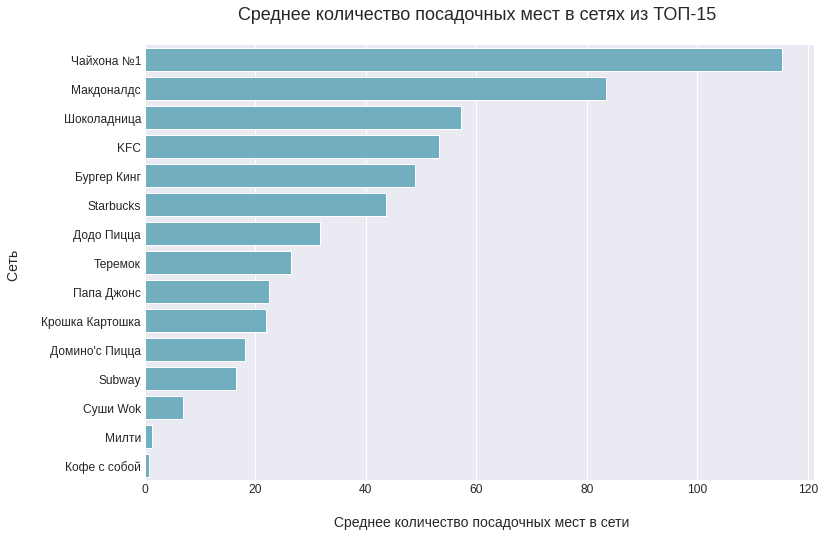

In [315]:
# построим график с ТОП-15 сетями

plt.figure(figsize=(12,8))
sns.barplot(data=chain_15, orient='h', x='mean', y='object_name', color='c')
plt.title('Среднее количество посадочных мест в сетях из ТОП-15 \n', fontsize = 18)
plt.grid(axis='x')
plt.xlabel('\n Среднее количество посадочных мест в сети', fontsize=14)
plt.ylabel('Сеть \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

У заведений с количеством объектов > 100 средняя посадка 55 человек, медианное значение практически такое же. Исключение _Чайхона №1_ со средним 150 и медианой 99. В целом сетевые объекты небольшие.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
От `(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0, 0, '')...` можно избавиться добавив `plt.show()` или `;` в строке</div>


<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

Три визуализации выше изображают одно и тоже, к чему их такое количество?  </div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Петр, спасибо за plt.show(), уже устал ставить ";" в конце строчек.Я полностью переделал раздел, эти ячейки удалил, твой комментарий оставил.
Согласно твоим рекомендациям пересчитал посадочные места в каждой сети из ТОП-15 по количеству объектов.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Признателен, много промежуточных действий вывдено, которые пререгружают работу, да для проверки это отлично и правильно, но вообще их можно подчищать в финальной версии проекта
</div>


### Вывод:

Выделили ТОП-15 сетей обественного питания по количеству объектов:

1. Шоколадница
2. KFC
3. Макдоналдс
4. Бургер Кинг
5. Теремок
6. Крошка Картошка
7. Домино'с Пицца
8. Милти
9. Суши Wok
10. Папа Джонс
11. Starbucks
12. Subway
13. Кофе с собой
14. Додо Пицца
15. Чайхона №1

Среди этих ТОП-15 среднее количество посадочных мест колебелется около цифры 50.Исключение _Чайхона №1_ со средним 150 и Макдональдс с 83 посадочными местами. 

Можно сделать осторожный вывод: **основные заведения в сетях небольшие, около 50 посадочных мест**

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

В этом блоке предполагалось сравнение не всех сетевых заведений, а сетей друг с другом, одной сетью в данном случае понимается заведения с одним заведением
</div>


<div class="alert alert-info"> <b>Комментарий студента:</b> Петр, вроде все переделал, лишние графики убрал, посадочные места посмотрел в разрезе разных сетей.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Обычно здесь строят диаграмму рассеяния по одной оси число заведений в сети, по другой среднее число посадочных мест, чтобы оценить вообще все сети, какие закономерности наблюдаются не только в крупнейших, чтобы понять, а вдруг мелкие сети тоже популярны
</div>


###  Среднее количество посадочных мест для каждого вида объекта

Группируем данные по _object_type_ и считаем среднее количество посадочных мест.

In [316]:
t = df.groupby('object_type')['number'].agg(['mean']).round(0)\
                            .sort_values(by='mean', ascending=False)
(t
 .style
 .format("{:.0f}")
 .background_gradient(cmap='Blues', axis=0)
)

,mean
object_type,
столовая,130
ресторан,97
буфет,52
бар,44
кафе,40
предприятие быстрого обслуживания,21
кафетерий,9
закусочная,8
магазин (отдел кулинарии),6


In [317]:
t = t.reset_index()

In [318]:
t

,object_type,mean
0,столовая,130.0
1,ресторан,97.0
2,буфет,52.0
3,бар,44.0
4,кафе,40.0
5,предприятие быстрого обслуживания,21.0
6,кафетерий,9.0
7,закусочная,8.0
8,магазин (отдел кулинарии),6.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

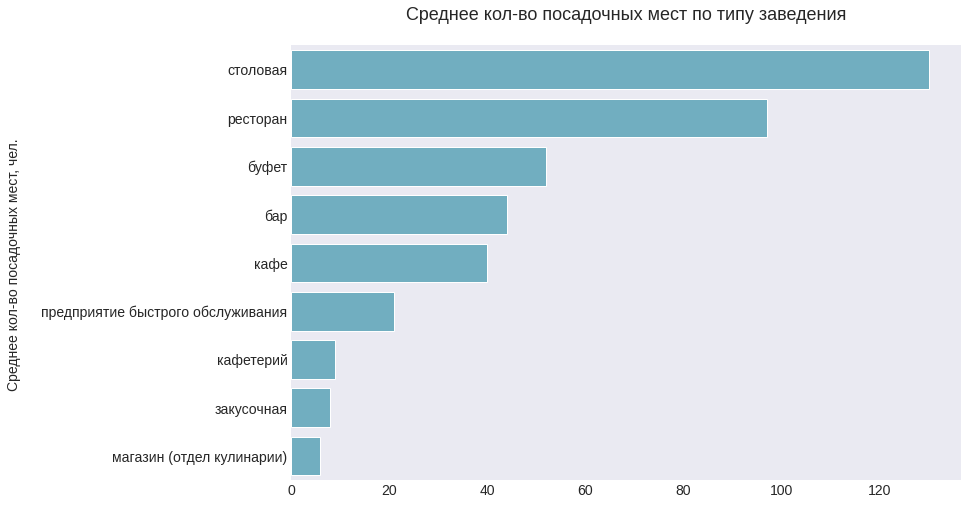

In [319]:
plt.figure(figsize=(12,8))
sns.barplot(data=t, orient='h', x='mean', y='object_type', color='c')
plt.title('Среднее кол-во посадочных мест по типу заведения\n', fontsize=18)
plt.ylabel('Среднее кол-во посадочных мест, чел. \n', fontsize=14)
plt.xlabel('')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
* Здесь лучше бы подшли ящики с усами, при помощи них можно было посмотреть не только на среднее число мест в каждом типе заведения, но оценить и квартили, медиану, насколько значительные выбросы бывают.
* Понравилось, что ты добавил таблицу с числами, чтобы точнее понимать сколько мест в каждом типе заведений, можно подписывать и столбцы, это может показаться сложным, но вот [материал](https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples), если решишься попробовать</div>


<div class="alert alert-info"> <b>Комментарий студента:</b> В следующий раз сделаю так, покаа же немного отстаю и оставлю изначальный вариант.</div>

In [320]:
# смотрим статистические данные в цифрах, сортируем по среднему

df.groupby('object_type')['number'].describe().\
sort_values(by='mean', ascending=False).round()

,count,mean,std,min,25%,50%,75%,max
object_type,,,,,,,,
столовая,2584.0,130.0,95.0,0.0,52.0,103.0,200.0,1400.0
ресторан,2282.0,97.0,95.0,0.0,46.0,80.0,114.0,1500.0
буфет,577.0,52.0,56.0,0.0,15.0,32.0,80.0,320.0
бар,855.0,44.0,67.0,0.0,20.0,35.0,50.0,1700.0
кафе,6071.0,40.0,38.0,0.0,15.0,30.0,50.0,533.0
предприятие быстрого обслуживания,1898.0,21.0,39.0,0.0,0.0,6.0,25.0,580.0
кафетерий,395.0,9.0,15.0,0.0,0.0,6.0,12.0,200.0
закусочная,349.0,8.0,17.0,0.0,0.0,0.0,10.0,216.0
магазин (отдел кулинарии),273.0,6.0,10.0,0.0,0.0,0.0,8.0,50.0


### Вывод
Больше всего посадочных мест ожидаемо в столовых — среднее 130 человека. В ресторанах тоже большое среднее значение — 97. Этот формат нам неинтересен, у нас небольшое кафе.

В интересующем нас формате среднее количество посадочных мест равно 40. Медиана 30.   

Стоит отметить большое число мест в буфетах — 52. При медиане в 32 среднее ушло вверх из-за больших значений в _number_ до 320 человек. 

Интерес представляет низкая медиана у фастфудов — всего 6 человек. Среднее в 3.5 раза больше, максимальное значение 580 — возможно считаются все посадочные места на фуд-кортах в моллах.

### Выделение в отдельный столбец информации об улице из столбца

In [321]:
# посмотрим на столбец с адресом

df['address'].head()

0           город Москва, улица Егора Абакумова, дом 9
1    город Москва, улица Талалихина, дом 2/1, корпус 1
2            город Москва, Абельмановская улица, дом 6
3              город Москва, Абрамцевская улица, дом 1
4    город Москва, Абрамцевская улица, дом 9, корпус 1
Name: address, dtype: object

In [322]:
# Выделим из адреса конкретно названия улиц

df['street'] = df['address'].transform(lambda x: str(x).split(", ")[1]) 
df['street'].value_counts()

город Зеленоград          232
проспект Мира             204
Профсоюзная улица         181
Ленинградский проспект    170
Пресненская набережная    167
                         ... 
дом 5/14                    1
Ащеулов переулок            1
Новолучанская улица         1
Зубарев переулок            1
деревня Дудкино             1
Name: street, Length: 1900, dtype: int64

### Вывод:

Вывели адрес в отдельный столбец _street_. Данные грязноваты, есть названия городов и поселений. В дальнейшем нужные для работы данные почистим.

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 


Метод допустим, но если смотреть с точки зрения качества - у нас улица не всегда располагаются на второй поизиции в строке, получается, что результат грубоват, да ты потом проверяешь вхождение некоторых стоп слов. Но рекомендую использовать маркеры: улица, бульвар и т.д. которые помогут определить позицию, в которой находится улица в строке.
</div>

### ТОП-10 улиц

In [323]:
# еще раз посмотрим на улицы по количеству заведений на них

df['street'].value_counts()

город Зеленоград          232
проспект Мира             204
Профсоюзная улица         181
Ленинградский проспект    170
Пресненская набережная    167
                         ... 
дом 5/14                    1
Ащеулов переулок            1
Новолучанская улица         1
Зубарев переулок            1
деревня Дудкино             1
Name: street, Length: 1900, dtype: int64

В первой же строчке видим "город Зеленоград". Кафе мы открываем в Москве, Зеленоград и прочие похожие города-спутники нам не подходят.

In [324]:
# посмотрим, сколько таких городов в данных

df[df['street'].str.contains('город ', regex=False)]['street'].unique()

array(['город Зеленоград', 'город Троицк', 'город Щербинка',
       'город Московский'], dtype=object)

In [325]:
# есть ли города в топ-10 популярных улиц

t = df.groupby('street')['id'].agg(['count']).sort_values(by='count', \
                                                  ascending=False).reset_index()
t.head(10)                                                  

,street,count
0,город Зеленоград,232
1,проспект Мира,204
2,Профсоюзная улица,181
3,Ленинградский проспект,170
4,Пресненская набережная,167
5,Варшавское шоссе,161
6,Ленинский проспект,147
7,поселение Сосенское,137
8,проспект Вернадского,128
9,Кутузовский проспект,114


In [326]:
# получим логическую series при наличии слова "город" в столбце street

t['street'].str.contains('город ', regex=False)

0        True
1       False
2       False
3       False
4       False
        ...  
1895    False
1896    False
1897    False
1898    False
1899    False
Name: street, Length: 1900, dtype: bool

In [327]:
# запишем в новую переменную adress улицы без слова "город" 
# выведем первые 10 улиц
adress = t[~t['street'].str.contains('город ', regex=False)]
adress[:10]

,street,count
1,проспект Мира,204
2,Профсоюзная улица,181
3,Ленинградский проспект,170
4,Пресненская набережная,167
5,Варшавское шоссе,161
6,Ленинский проспект,147
7,поселение Сосенское,137
8,проспект Вернадского,128
9,Кутузовский проспект,114
10,Каширское шоссе,111


In [328]:
# аналогично убираем "поселения"
# выведем очищенные топ-10 улиц

adress = adress[~adress['street'].str.contains('поселение', regex=False)].reset_index(drop=True)
adress.head(10)

,street,count
0,проспект Мира,204
1,Профсоюзная улица,181
2,Ленинградский проспект,170
3,Пресненская набережная,167
4,Варшавское шоссе,161
5,Ленинский проспект,147
6,проспект Вернадского,128
7,Кутузовский проспект,114
8,Каширское шоссе,111
9,Кировоградская улица,108


In [329]:
adress['street'][:10]

0             проспект Мира
1         Профсоюзная улица
2    Ленинградский проспект
3    Пресненская набережная
4          Варшавское шоссе
5        Ленинский проспект
6      проспект Вернадского
7      Кутузовский проспект
8           Каширское шоссе
9      Кировоградская улица
Name: street, dtype: object

### Вывод:

Самые популярные улицы Москвы для заведений общественного питания:

1. проспект Мира
2. Профсоюзная улица
3. Ленинградский проспект
4. Пресненская набережная
5. Варшавское шоссе
6. Ленинский проспект
7. проспект Вернадского
8. Кутузовский проспект
9. Каширское шоссе
10. Кировоградская улица


### График топ-10 улиц по количеству объектов общественного питания.

In [330]:
# еще раз топ-10 улиц по количеству заведений

adress[:10]

,street,count
0,проспект Мира,204
1,Профсоюзная улица,181
2,Ленинградский проспект,170
3,Пресненская набережная,167
4,Варшавское шоссе,161
5,Ленинский проспект,147
6,проспект Вернадского,128
7,Кутузовский проспект,114
8,Каширское шоссе,111
9,Кировоградская улица,108


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Топ получен верный</div>


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

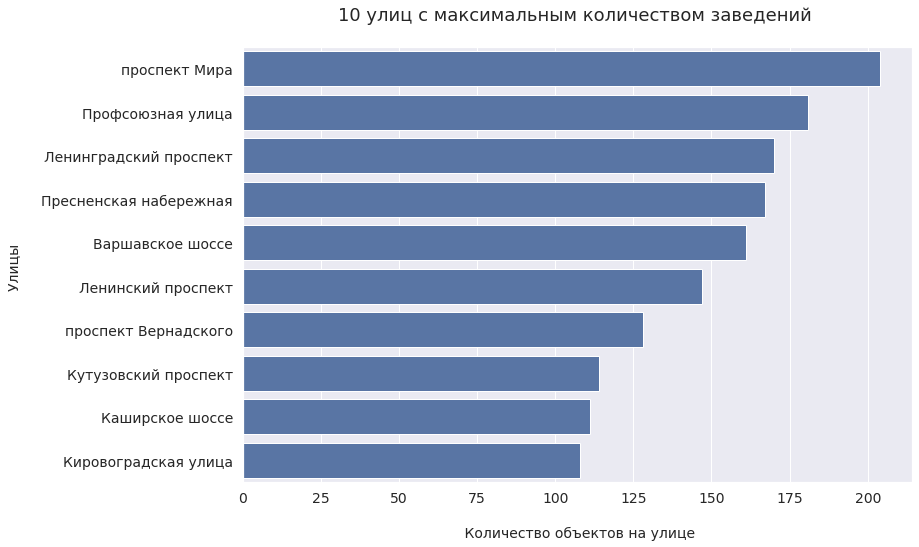

In [331]:
# строим график

sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))
plt.title('10 улиц с максимальным количеством заведений \n', fontsize=18)
sns.barplot(
    x="count", 
    y="street", 
    data=adress[:10], 
    estimator=sum, 
    ci=None, 
    color='b');
plt.ylabel('Улицы \n', fontsize=14)
plt.xlabel('\n Количество объектов на улице', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

### В каких районах Москвы находятся ТОП-10 улиц

Обратимся к внешним данным, чтобы сопоставить каждую улицу с раойном и округом.

Ссылка на сторонний файл с районами и улицами:

https://docs.google.com/spreadsheets/d/1bRyi5okg6A3av4nFprLlpojq6dGSXUJXWbWXi6UOyTI/edit?usp=sharing

Импортируем файл с районами и улицами

In [332]:
from io import BytesIO
import requests
spreadsheet_id = '1bRyi5okg6A3av4nFprLlpojq6dGSXUJXWbWXi6UOyTI'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'\
                                                     .format(spreadsheet_id)
r = requests.get(file_name)
area_street = pd.read_csv(BytesIO(r.content))

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

В случае когда ты кому-то отправляешь свой проект, может так случиться, что у человека нет `io` например, и тогда ему придется пролистать до места где ты её используешь, а если бы обращения ко всем библиотекам было бы в начале, такая проблема исключается. Ну и вдруг ты выше будешь применять что-то из этих библиотек, тогда код упадёт</div>

In [333]:
# смотрим на новую таблицу

area_street.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [334]:
# ТОП-10 улиц из adress запишем в новую переменную adress_top_10

adress_top_10 = adress.head(10)

In [335]:
adress_top_10

,street,count
0,проспект Мира,204
1,Профсоюзная улица,181
2,Ленинградский проспект,170
3,Пресненская набережная,167
4,Варшавское шоссе,161
5,Ленинский проспект,147
6,проспект Вернадского,128
7,Кутузовский проспект,114
8,Каширское шоссе,111
9,Кировоградская улица,108


In [336]:
# джойним наши ТОП-10 улиц с новыми данными из area_street 
# по полям street и streetname, тип left. Столбец areaid из area_street не берем

adress_with_area = adress_top_10.merge(area_street[['streetname', 'area', 'okrug']],\
                            left_on='street', right_on='streetname', how='left')

In [337]:
# улицы ТОП-10 с указанием района и округа

adress_with_area.head()

,street,count,streetname,area,okrug
0,проспект Мира,204,проспект Мира,Алексеевский район,СВАО
1,проспект Мира,204,проспект Мира,Ярославский Район,СВАО
2,проспект Мира,204,проспект Мира,Район Марьина роща,СВАО
3,проспект Мира,204,проспект Мира,Останкинский район,СВАО
4,проспект Мира,204,проспект Мира,Район Ростокино,СВАО


In [338]:
# убираем дублирующий столшбец streetname

adress_with_area = adress_with_area.drop(['streetname'], axis=1)
adress_with_area

,street,count,area,okrug
0,проспект Мира,204,Алексеевский район,СВАО
1,проспект Мира,204,Ярославский Район,СВАО
2,проспект Мира,204,Район Марьина роща,СВАО
3,проспект Мира,204,Останкинский район,СВАО
4,проспект Мира,204,Район Ростокино,СВАО
...,...,...,...,...
43,Каширское шоссе,111,Район Орехово-Борисово Южное,ЮАО
44,Каширское шоссе,111,Район Орехово-Борисово Северное,ЮАО
45,Кировоградская улица,108,Район Чертаново Центральное,ЮАО
46,Кировоградская улица,108,Район Чертаново Северное,ЮАО


In [339]:
# посмотрим на районы, через которые проходят ТОП-10 улиц

adress_with_area['area'].unique()

array(['Алексеевский район', 'Ярославский Район', 'Район Марьина роща',
       'Останкинский район', 'Район Ростокино', 'Район Свиблово',
       'Мещанский район', 'Академический район', 'Район Черемушки',
       'Район Ясенево', 'Район Коньково', 'Обручевский район',
       'Район Теплый Стан', 'Район Аэропорт', 'Район Беговой',
       'Хорошевский район', 'Район Сокол', 'Пресненский район',
       'Район Чертаново Центральное', 'Район Чертаново Северное',
       'Район Чертаново Южное', 'Донской район',
       'Район Нагатино-Садовники', 'Нагорный район',
       'Район Северное Бутово', 'Район Южное Бутово',
       'Район Проспект Вернадского', 'Район Тропарево-Никулино',
       'Район Гагаринский', 'Ломоносовский район', 'Район Якиманка',
       'Район Раменки', 'Район Дорогомилово', 'Район Фили-Давыдково',
       'Район Москворечье-Сабурово', 'Район Орехово-Борисово Южное',
       'Район Орехово-Борисово Северное'], dtype=object)

In [340]:
# для дальнейшего анализа посмотрим, через какое количество районов проходит, 
# например, проспект Мира

adress_with_area.query('street == "проспект Мира"')['area'].nunique()

7

In [341]:
# сколько всего районов

print('Всего', len(adress_with_area['area'].unique()), 'районов')

Всего 37 районов


**Важное замечание**

Надеюсь, имею оставить за собой право просто перечислить список районов, через которые проходят улицы из списка ТОП-10. Объясняю, почему.

Можно сгруппировать данные по району и посчитать количество объектов в районе. Это неверный подход. Потому что объекты посчитаны по улице без геоданных. Например, проспект Мира проходит через 7 районов. Мы не можем пасположенные на этой улице 204 объекты разделить по районам и посчитать количество объектов в районе.

Также можно посчитать, какое количество улиц проходит через каждый район. Получим цифры 1 и 2. Опять же, без привязки к геоданным это ничего не значит — на одной улице может быть больше объектов, чем на двух.

Поэтому оставляю список районов для ТОП-10 улиц как есть.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
При имеющихся данных абсолютно справедливые замечания, для повышения точности вычислений можно было при помощи сторонних источников получать геоданные и при помощи них получать не абстрактуню улицу, а более точное расположение </div>


### Вывод по самым популярным улицам и районам

Список из 10 улиц, на которых расположено максимальное количество заведений общепита:

- проспект Мира
- Профсоюзная улица
- Ленинградский проспект
- Пресненская набережная
- Варшавское шоссе
- Ленинский проспект
- проспект Вернадского
- Кутузовский проспект
- Каширское шоссе
- Кировоградская улица


Список районов Москвы, через которые проходят улицы из списка ТОП-10:

'Алексеевский район', 'Ярославский Район', 'Район Марьина роща',
       'Останкинский район', 'Район Ростокино', 'Район Свиблово',
       'Мещанский район', 'Академический район', 'Район Черемушки',
       'Район Ясенево', 'Район Коньково', 'Обручевский район',
       'Район Теплый Стан', 'Район Аэропорт', 'Район Беговой',
       'Хорошевский район', 'Район Сокол', 'Пресненский район',
       'Район Чертаново Центральное', 'Район Чертаново Северное',
       'Район Чертаново Южное', 'Донской район',
       'Район Нагатино-Садовники', 'Нагорный район',
       'Район Северное Бутово', 'Район Южное Бутово',
       'Район Проспект Вернадского', 'Район Тропарево-Никулино',
       'Район Гагаринский', 'Ломоносовский район', 'Район Якиманка',
       'Район Раменки', 'Район Дорогомилово', 'Район Фили-Давыдково',
       'Район Москворечье-Сабурово', 'Район Орехово-Борисово Южное',
       'Район Орехово-Борисово Северное'



### Улиц с одним объектом общественного питания

In [342]:
# еще раз посмотрим на сводную таблицу с улицами

adress.head()

,street,count
0,проспект Мира,204
1,Профсоюзная улица,181
2,Ленинградский проспект,170
3,Пресненская набережная,167
4,Варшавское шоссе,161


In [343]:
# сделаем срез по adress с улицами, на которых одно заведение

adress.query('count == 1')

,street,count
1299,улица Демьяна Бедного,1
1300,Андреево-Забелинская улица,1
1301,1-й Саратовский проезд,1
1302,Андроньевская площадь,1
1303,2-й Стрелецкий проезд,1
...,...,...
1872,дом 1,1
1873,дом 10,1
1874,дом 11,1
1875,дом 118Б,1


In [344]:
# сколько таких улиц

len(adress.query('count == 1'))

578

In [345]:
# запишем эти улицы в датафрейм adress_1_street

adress_1_street = adress.query('count == 1')

In [346]:
adress_1_street.head()

,street,count
1299,улица Демьяна Бедного,1
1300,Андреево-Забелинская улица,1
1301,1-й Саратовский проезд,1
1302,Андроньевская площадь,1
1303,2-й Стрелецкий проезд,1


In [347]:
# сколько всего районов и округов

area_street[['okrug', 'area']].nunique()

okrug     10
area     123
dtype: int64

По аналогии с ТОП-10 джойним улицы с одним заведением с данными об улицах, районах и округах

In [348]:
adress_1street_area = adress_1_street.merge(area_street[['streetname', 'area', 'okrug']],\
                            left_on='street', right_on='streetname', how='left')

In [349]:
adress_1street_area.head()

,street,count,streetname,area,okrug
0,улица Демьяна Бедного,1,улица Демьяна Бедного,Район Хорошево-Мневники,СЗАО
1,Андреево-Забелинская улица,1,Андреево-Забелинская улица,Район Богородское,ВАО
2,1-й Саратовский проезд,1,1-й Саратовский проезд,Район Текстильщики,ЮВАО
3,Андроньевская площадь,1,Андроньевская площадь,Таганский район,ЦАО
4,2-й Стрелецкий проезд,1,2-й Стрелецкий проезд,Район Марьина роща,СВАО


In [350]:
# удаляем дублирующий столбец streetname

#adress_1street_area = adress_1street_area.drop('streetname', axis=1)
#adress_1street_area.head()

In [351]:
# сколько улиц с одним объектом

len(adress_1street_area['street'].unique())

578

In [352]:
# сколько всего строк в датафрейме adress_1street_area

len(adress_1street_area)

621

In [353]:
# проверяем пропуски

adress_1street_area[adress_1street_area.isna()]

,street,count,streetname,area,okrug
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
616,NaN,NaN,NaN,NaN,NaN
617,NaN,NaN,NaN,NaN,NaN
618,NaN,NaN,NaN,NaN,NaN
619,NaN,NaN,NaN,NaN,NaN


In [354]:
# количество пропусков

adress_1street_area.isna().sum()

street         0
count          0
streetname    61
area          61
okrug         61
dtype: int64

In [355]:
# удаляем пропуски

adress_1street_area.dropna(inplace=True)

In [356]:
# посмотрим количество дубликатов по столбцу street

adress_1street_area.duplicated(subset='street').sum()

43

In [357]:
# удяляем явные дубликаты

adress_1street_area.drop_duplicates(subset=['street'], inplace=True)
len(adress_1street_area)

517

Дубликаты удалили, на выходе у нас список из 517 улиц, на которых расположен один объект.

In [358]:
# таблица с количеством однообъектных улиц, сгруппированных по районам

one_ob_areas = adress_1street_area.groupby('area')['street'].agg(['count'])\
.reset_index().sort_values(by='count', ascending=False).reset_index(drop=True)
one_ob_areas.rename(columns={"count": "number_of_streets"}, inplace=True)
one_ob_areas.head(10)

,area,number_of_streets
0,Таганский район,27
1,Басманный район,24
2,Район Хамовники,22
3,Тверской район,20
4,Пресненский район,19
5,Район Марьина роща,17
6,Район Сокольники,15
7,Район Арбат,14
8,Район Замоскворечье,14
9,Мещанский район,13


In [359]:
# сколько всего таких районов

len(one_ob_areas)

97

У нас 97 районов, через которые проходят улицы с одним объектом. Список большой, само по себе нахождения района в этом списке ничег оне говорит.

Интереснее смотреть на количество "однообъектных" улиц в разрезе районов. Например, в Таганском районе таких 27, а в Марьино всего 1.

Можно посмотреть на "однообъектные" улицы в разрезе округов

In [360]:
# группируем таблицы adress_1street_area по округу 

adress_1street_area.groupby('okrug')['street'].count()\
        .sort_values(ascending=False).reset_index().head()

,okrug,street
0,ЦАО,171
1,СВАО,65
2,ВАО,64
3,САО,50
4,ЮВАО,50


### Вывод:

Мы насчитали 97 районов, через которые проходят улицы с одним объектом общественного питания. Учитывая, что всего 123 района, эта цифра не дает практически никакой информации. Логичнее выделить 10 районов, через которые проходит максимальное количество однообъектных улиц. ТОП-10 таких районов:  

1. Таганский район  
2. Район Хамовники    
3. Басманный район  
4. Тверской район  
5.	Пресненский район  
6.	Район Марьина роща  
7.	Район Арбат  
8.	Мещанский район	  
9.	Район Сокольники	  
10.	Район Замоскворечье  

То же самое и с округами. Все 10 округов имеют такие однообъектные улицы. По аналогии с районами выделим ТОП-3 округов:

1. ЦАО	
2. ВАО	
3. СВАО

Наличие одного заведения на улице дает повод запросить дополнительную информацию. Возможно, единственное заведение на улице загружено на 100% и имеет хорошую выручку. С другой стороны возможен и другой вариант, когда единственное кафе на улице из-за низкого трафика простаивает половину времени.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Такая популярность именно ЦАО может говорить о дороговизне аренды, о том, что это множество коротких улочек в центре, на которых в принципе не так много заведений может быть </div>


## Общий вывод

* Проанализировали 15 284 записей об объектах общественного питания Москвы  

* В Москве чаще всего представлены столовые, рестораны и кафе.

* Сетевые объекты — это примерно 20% от всех данных. 80% объектов несетевые. 

* Сетевое распространение характерно для кафе, предприятий быстрого обслуживания и ресторанов

* Для большей части сетей характерно большое количество заведений с малым количеством посадочных мест и наоборот, малое количество заведений с большим количеством посадочных мест.

* Среднее количество посадочных мест для столовых (130), ресторанов (97), буфетов (52), баров(44), кафе (40), предприятие быстрого обслуживания	(21)

* Большая часть улиц с наибольшим количеством объектов находится в районах ЦАО, ЮЗАО и ЮАО. Полный список таких улиц ниже в порядке убывания по количеству объектов общепита:

  - проспект Мира
    
  - Профсоюзная улица
    
  - Ленинградский проспект
    
  - Пресненская набережная
    
  - Варшавское шоссе
    
  - Ленинский проспект
    
  - проспект Вернадского
    
  - Кутузовский проспект
    
  - Каширское шоссе
    
  - Кировоградская улица
    
* 578 улицы имеют только 1 объект общественного питания. 

  


## Рекомендации инвесторам

Есть две проблемы:
1. Кафе небольшое и в нем будут роботы. Больше никакой информации
2. В данных об объектах нет ни слова о финансовой успешности. Кафе в центре Москвы с 500+ посадочными местами может быть убыточным.  

Достаточно скудные данные на входе. Попробуем исходя из них что-то рекомендовать:

- Кафе - это самый популярный вид общественного питания в Москве, инвесторы выбрали правильный формат.

- В кафе маленькая "посадка", в среднем 40 человек. Хорошо подходит под формат "небольшое".

- Небольшое кафе лучше разместить в центре Москвы, там много улиц с одним объектом. Конкуренция будет меньше, плюс за нашим кафе преимущество в виде роботов.

- Кафе самый популярный сетевой формат. В случае успеха бизнес можно будет легко масштабировать и перейти, например, к франшизе.


Презентация:

https://disk.yandex.ru/i/YJb5v4OkTJZspw

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    


Разумные рекомендации, превосходная работа. Если интересно, то используя геокодер (или датасет с координитами для адресов) и геовизуализацию можно построить распределение кафе на территории Москвы и выделить интересующие нас районы, затем в этих районах можно отобразить доступные площащи для аренды, спарсив какой-нибудь сайт объявлений и таким образом выбрать нужное местоположение. https://geocoder.readthedocs.io/ + https://python-visualization.github.io/folium/quickstart.html. Этим можно заняться, если захочется вернуться к проекту

   
**Касательно презентации:** 
* Понравилось, что ты добавил автора
    
<br>
    
* Можно было бы добавить слайд с постановкой задач
* Рекомендую добавить нумерацию слайдов, чтобы заказчики могли задать вопрос по твоей презентации не с "верните на вон тот слайд с ...", а просто по номеру слайда
* Хотелось бы ссылок на источник информации
* Рекомендую добавлять рамку для отделения графиков от остальной части презентации и их выравнивать от слайда к слайду, а сейчас при переключении есть ощущения, что графики всегда в разных местах
   
Для оформления презентаций могу порекомендовать сервис https://readymag.com/. 
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 1. Слайд с постановкой задач добавил 2. Нумерацию тоже 3. Ссылки добавил 4. Рамки к графикам добавил и выровнял их.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Замечательно, спасибо за продуктивную совместную работу, желаю удачи!
</div>
